# Primer Github
[GitHub](https://github.com/dmishin/tsp-solver)


In [81]:
import tsplib95
import numpy as np
# Carga el problema desde un archivo
problem = tsplib95.load('berlin52.tsp')

# Accede a los nodos
nodos = list(problem.get_nodes())
print(nodos)

# Accede a la distancia entre nodos
distancia = problem.get_weight(1, 2)
print(distancia)

try:
    problem = tsplib95.load('berlin52.tsp')
except FileNotFoundError:
    print("Error: El archivo TSPLIB no fue encontrado.")
    exit()

# Obtiene la lista de todos los nodos
todos_los_nodos = list(problem.get_nodes())

# Define cuántos nodos quieres usar (ajusta este valor según necesites)
num_usar = 11

# Verifica que no se pidan más nodos de los disponibles
if num_usar > len(todos_los_nodos):
    print(f"Error: El archivo solo contiene {len(todos_los_nodos)} nodos.")
    exit()

# Selecciona solo los primeros `num_usar` nodos
nodos = todos_los_nodos[:num_usar]
num_nodos = len(nodos)

# Crea una matriz de distancias vacía
dist_matrix = np.zeros((num_nodos, num_nodos))

# Llena la matriz de distancias usando la información del problema TSPLIB
for i in range(num_nodos):
    for j in range(i + 1, num_nodos):
        u = nodos[i]
        v = nodos[j]
        distance = problem.get_weight(u, v)
        dist_matrix[i, j] = distance
        dist_matrix[j, i] = distance  # La distancia es simétrica


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]
666


In [83]:
from tsp_solver.greedy import solve_tsp
import tsplib95
import time

# Carga el problema desde el archivo TSPLIB

# Marca el tiempo de inicio justo antes de la parte que quieres medir
start_time = time.time()

# Resuelve el TSP usando la matriz de distancias
path = solve_tsp(dist_matrix)

# Marca el tiempo de finalización justo después de la parte que quieres medir
end_time = time.time()

# Calcula el tiempo transcurrido
execution_time = end_time - start_time

# Imprime el tiempo de ejecución
print(f"La resolución del TSP tomó {execution_time:.4f} segundos.")


# Imprime la ruta resultante (los índices corresponden al orden en la lista de nodos)
print(path)

# Si quieres los nombres originales de los nodos en la ruta:
nombres_ruta = [nodos[i] for i in path]
print(nombres_ruta)

# Opcional: Calcula la longitud total de la ruta
total_distance = 0
for i in range(len(path) - 1):
    u_index = path[i]
    v_index = path[i + 1]
    total_distance += dist_matrix[u_index, v_index]
# Agrega la distancia de vuelta al inicio para un ciclo completo si es necesario
# total_distance += dist_matrix[path[-1], path[0]]
print(f"Longitud total de la ruta: {total_distance}")

La resolución del TSP tomó 0.0056 segundos.
[1, 6, 2, 7, 9, 8, 0, 4, 5, 3, 10]
[2, 7, 3, 8, 10, 9, 1, 5, 6, 4, 11]
Longitud total de la ruta: 2886.0


# Segundo Github

http://github.com/chenmingxiang110/tsp_solver

1 0.1 %: 5282.0
2 0.2 %: 3177.0
3 0.3 %: 3177.0
4 0.4 %: 3177.0
5 0.5 %: 3177.0
6 0.6 %: 3177.0
7 0.7 %: 3177.0
8 0.8 %: 3177.0
9 0.9 %: 3177.0
10 1.0 %: 3177.0
11 1.1 %: 3177.0
12 1.2 %: 3177.0
13 1.3 %: 3177.0
14 1.4 %: 3177.0
15 1.5 %: 3177.0
16 1.6 %: 3177.0
17 1.7 %: 3177.0
18 1.8 %: 3177.0
19 1.9 %: 3177.0
20 2.0 %: 3177.0
21 2.1 %: 3177.0
22 2.2 %: 3177.0
23 2.3 %: 3177.0
24 2.4 %: 3177.0
25 2.5 %: 3177.0
26 2.6 %: 3177.0
27 2.7 %: 3177.0
28 2.8 %: 3177.0
29 2.9 %: 3177.0
30 3.0 %: 3177.0
31 3.1 %: 3177.0
32 3.2 %: 3177.0
33 3.3 %: 3177.0
34 3.4 %: 3177.0
35 3.5 %: 3177.0
36 3.6 %: 3177.0
37 3.7 %: 3177.0
38 3.8 %: 3177.0
39 3.9 %: 3177.0
40 4.0 %: 3177.0
41 4.1 %: 3177.0
42 4.2 %: 3177.0
43 4.3 %: 3177.0
44 4.4 %: 3177.0
45 4.5 %: 3177.0
46 4.6 %: 3177.0
47 4.7 %: 3177.0
48 4.8 %: 3177.0
49 4.9 %: 3177.0
50 5.0 %: 3177.0
51 5.1 %: 3177.0
52 5.2 %: 3177.0
53 5.3 %: 3177.0
54 5.4 %: 3177.0
55 5.5 %: 3177.0
56 5.6 %: 3177.0
57 5.7 %: 3177.0
58 5.8 %: 3177.0
59 5.9 %: 3177.0
60 6.0

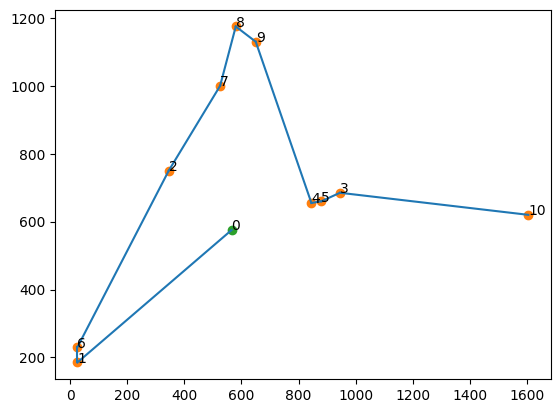

La resolución del TSP tomó 0.0056 segundos.


In [98]:
import numpy as np
from iter_solver import calculate_distance_matrix, auto_solver, plot_route
import time
start_time = time.time()
# Randomize 50 points for testing
coords = []
# Calculate the distance matrix
# distance_matrix = calculate_distance_matrix(coords)
coords = np.array([problem.node_coords[nodo] for nodo in nodos])
# Solve the TSP problem with ruin & recreate method
d, r = auto_solver(dist_matrix, n_iter=1000, local_search_iter=100,
                   init_route=None, back_to_origin=False, verbose_step=1)
print(d)
print(r)
plot_route(coords, r)# da error por las coordenadas que no las e implementado
end_time = time.time()
print(f"La resolución del TSP tomó {execution_time:.4f} segundos.")

# Tercer Github
https://github.com/mostafabahri/tsp-solver

In [84]:
'''
Travelling Sales Person problem
Branch and bound algorithm

gitHub@MostafaBahri
gitLab@Mostafa_c6
'''
from utility import Node, PriorityQueue

start = time.time()
def travel(adj_mat, src=0):
    optimal_tour = []
    n = len(adj_mat)
    if not n:
        raise ValueError("Invalid adj Matrix")
    u = Node()
    PQ = PriorityQueue()
    optimal_length = 0
    v = Node(level=0, path=[0])
    min_length = float('inf')  # infinity
    v.bound = bound(adj_mat, v)
    PQ.put(v)
    while not PQ.empty():
        v = PQ.get()
        if v.bound < min_length:
            u.level = v.level + 1
            for i in filter(lambda x: x not in v.path, range(1, n)):
                u.path = v.path[:]
                u.path.append(i)
                if u.level == n - 2:
                    l = set(range(1, n)) - set(u.path)
                    u.path.append(list(l)[0])
                    # putting the first vertex at last
                    u.path.append(0)

                    _len = length(adj_mat, u)
                    if _len < min_length:
                        min_length = _len
                        optimal_length = _len
                        optimal_tour = u.path[:]

                else:
                    u.bound = bound(adj_mat, u)
                    if u.bound < min_length:
                        PQ.put(u)
                # make a new node at each iteration!
                u = Node(level=u.level)

    # shifting to proper source(start of path)
    optimal_tour_src = optimal_tour
    if src != 1:  # Cambiado 'is not' por '!='
        optimal_tour_src = optimal_tour[:-1]
        y = optimal_tour_src.index(src)
        optimal_tour_src = optimal_tour_src[y:] + optimal_tour_src[:y]
        optimal_tour_src.append(optimal_tour_src[0])

    return optimal_tour_src, optimal_length


def length(adj_mat, node):
    tour = node.path
    # returns the sum of two consecutive elements of tour in adj[i][j]
    return sum([adj_mat[tour[i]][tour[i + 1]] for i in range(len(tour) - 1)])  # Cambiado xrange por range


def bound(adj_mat, node):
    path = node.path
    _bound = 0

    n = len(adj_mat)
    determined, last = path[:-1], path[-1]
    # remain is index based
    remain = list(filter(lambda x: x not in path, range(n)))  # Añadido list() para Python 3

    # for the edges that are certain
    for i in range(len(path) - 1):  # Cambiado xrange por range
        _bound += adj_mat[path[i]][path[i + 1]]

    # for the last item
    _bound += min([adj_mat[last][i] for i in remain])

    p = [path[0]] + remain
    # for the undetermined nodes
    for r in remain:
        _bound += min([adj_mat[r][i] for i in filter(lambda x: x != r, p)])
    return _bound


if __name__ == '__main__':
    matrix = [
        [0, 14, 4, 10, 20],
        [14, 0, 7, 8, 7],
        [4, 5, 0, 7, 16],
        [11, 7, 9, 0, 2],
        [18, 7, 17, 4, 0]
    ]

    print(travel(dist_matrix))

end = time.time()
print(f"Tiempo de ejecución: {end - start:.4f} segundos")

([0, 4, 5, 3, 10, 9, 8, 7, 2, 6, 1, 0], np.float64(4038.0))
Tiempo de ejecución: 0.9951 segundos


# Cuarto Github
https://github.com/Nikh9123/TSP-SOLVER

In [85]:
import tsplib95
import numpy as np
from sys import maxsize
import time

def check_min(l):
    n = len(l)
    i = n - 2
    while i >= 0 and l[i] > l[i + 1]:
        i -= 1
    if i == -1:
        return False
    j = i + 1
    while j < n and l[j] > l[i]:
        j += 1
    j -= 1
    l[i], l[j] = l[j], l[i]
    l[i+1:] = reversed(l[i+1:])
    return True

def TSP(graph, start):
    v = [i for i in range(len(graph)) if i != start]
    min_path = maxsize
    best_route = None
    start_time = time.time()
    while True:
        cost = 0
        s = start
        for i in v:
            cost += graph[s][i]
            s = i
        cost += graph[s][start]
        if cost < min_path:
            min_path = cost
            best_route = [start] + v[:] + [start]
        if not check_min(v):
            break
    end_time = time.time()
    print(f"Tiempo de ejecución de TSP: {end_time - start_time:.4f} segundos")
    return min_path, best_route

def resolver_tsp_solo_con_6_nodos(nombre_archivo_tsp, num_usar=6):
    try:
        problem = tsplib95.load(nombre_archivo_tsp)
    except FileNotFoundError:
        print(f"Error: El archivo {nombre_archivo_tsp} no fue encontrado.")
        return

    todos_los_nodos = list(problem.get_nodes())

    if num_usar > len(todos_los_nodos):
        print(f"Error: Solo hay {len(todos_los_nodos)} nodos en el archivo.")
        return

    nodos = todos_los_nodos[:num_usar]
    num_nodos = len(nodos)

    dist_matrix = np.zeros((num_nodos, num_nodos))
    for i in range(num_nodos):
        for j in range(i + 1, num_nodos):
            u, v = nodos[i], nodos[j]
            distance = problem.get_weight(u, v)
            dist_matrix[i, j] = dist_matrix[j, i] = distance

    costo, ruta_indices = TSP(dist_matrix, start=0)

    # Traducir los índices a los nombres reales de nodos
    ruta_nombres = [nodos[i] for i in ruta_indices]
    print("Ruta óptima:", ruta_nombres)
    print("Costo total:", costo)

if __name__ == '__main__':
    resolver_tsp_solo_con_6_nodos('berlin52.tsp', num_usar=10) # Aqui cambie el num_usar a el numero de nodos que quieras


Tiempo de ejecución de TSP: 1.2737 segundos
Ruta óptima: [1, 2, 7, 3, 8, 9, 10, 4, 6, 5, 1]
Costo total: 2826.0


# Quinto Github
https://github.com/fillipe-gsm/python-tsp

In [86]:
import numpy as np
from python_tsp.exact import solve_tsp_dynamic_programming

permutation, distance = solve_tsp_dynamic_programming(dist_matrix)

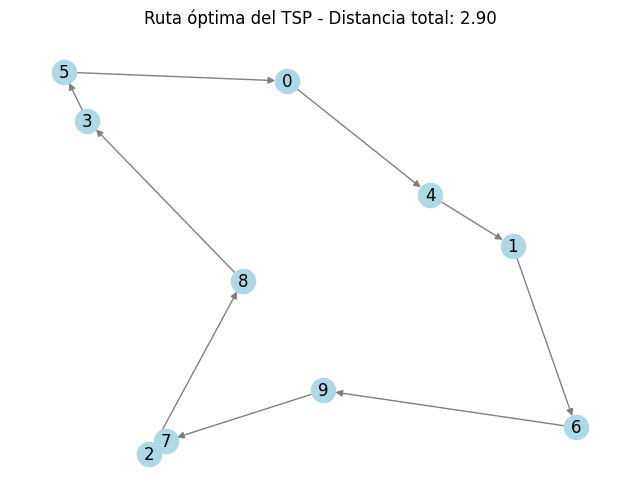

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from python_tsp.exact import solve_tsp_dynamic_programming

# Generar coordenadas aleatorias para 10 ciudades
num_ciudades = 10
np.random.seed(42)  # Para reproducibilidad
coordenadas = np.random.rand(num_ciudades, 2)

# Calcular la matriz de distancias euclidianas
from scipy.spatial.distance import cdist
matriz_distancias = cdist(coordenadas, coordenadas)

# Resolver el TSP
ruta, distancia_total = solve_tsp_dynamic_programming(matriz_distancias)

# Crear un grafo y agregar nodos con sus posiciones
G = nx.DiGraph()
for idx, (x, y) in enumerate(coordenadas):
    G.add_node(idx, pos=(x, y))

# Agregar las aristas según la ruta obtenida
for i in range(len(ruta)):
    origen = ruta[i]
    destino = ruta[(i + 1) % len(ruta)]  # Para cerrar el ciclo
    G.add_edge(origen, destino)

# Obtener las posiciones de los nodos
posiciones = nx.get_node_attributes(G, 'pos')

# Dibujar el grafo
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, posiciones, node_size=300, node_color='lightblue')
nx.draw_networkx_edges(G, posiciones, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, posiciones, font_size=12, font_color='black')
plt.title(f"Ruta óptima del TSP - Distancia total: {distancia_total:.2f}")
plt.axis('off')
plt.show()


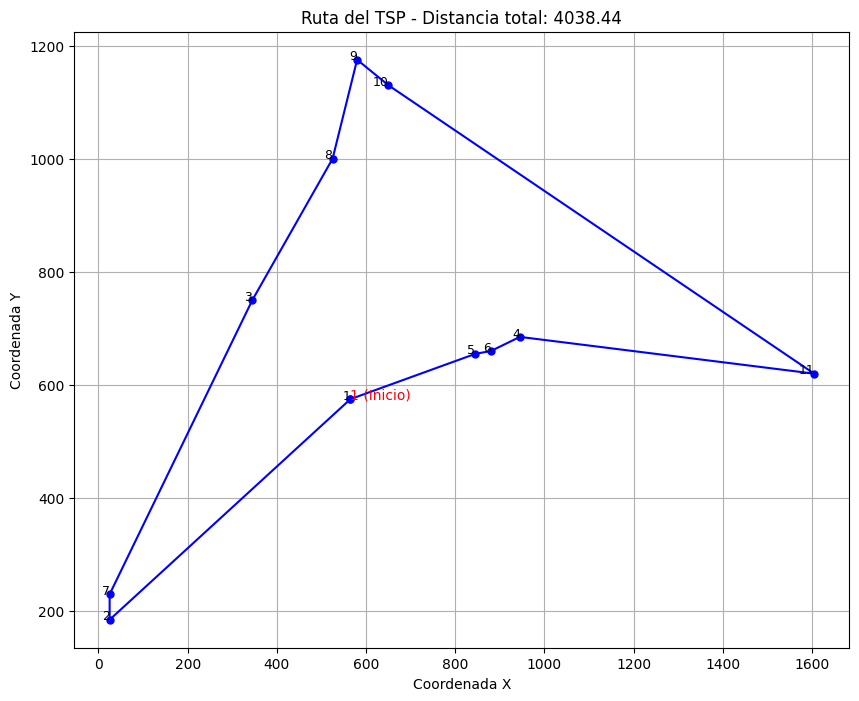

La resolución del TSP tomó 0.0056 segundos.


In [99]:
import tsplib95
import numpy as np
import matplotlib.pyplot as plt
from python_tsp.heuristics import solve_tsp_local_search
from scipy.spatial.distance import cdist

# Cargar el problema desde el archivo TSPLIB
try:
    problem = tsplib95.load('berlin52.tsp')
except FileNotFoundError:
    print("Error: El archivo 'berlin52.tsp' no fue encontrado.")
    exit()

# Obtener todos los nodos
todos_los_nodos = list(problem.get_nodes())

# Definir cuántos nodos usar
num_usar = 11

# Verificar que no se pidan más nodos de los disponibles
if num_usar > len(todos_los_nodos):
    print(f"Error: El archivo solo contiene {len(todos_los_nodos)} nodos.")
    exit()

# Seleccionar los primeros 'num_usar' nodos
nodos = todos_los_nodos[:num_usar]

# Obtener las coordenadas de los nodos seleccionados
coordenadas = np.array([problem.node_coords[nodo] for nodo in nodos])

# Calcular la matriz de distancias euclidianas
matriz_distancias = cdist(coordenadas, coordenadas)
start_time = time.time()
# Resolver el TSP utilizando búsqueda local
ruta, distancia_total = solve_tsp_local_search(matriz_distancias)

# Ordenar las coordenadas según la ruta obtenida
coordenadas_ruta = coordenadas[ruta + [ruta[0]]]  # Para cerrar el ciclo

# Crear el gráfico
plt.figure(figsize=(10, 8))
plt.plot(coordenadas_ruta[:, 0], coordenadas_ruta[:, 1], 'o-', color='blue', markersize=5)
for idx, nodo in enumerate(ruta):
    x, y = coordenadas[nodo]
    plt.text(x, y, str(nodos[nodo]), fontsize=9, ha='right')
# Etiquetar el nodo de inicio
x0, y0 = coordenadas[ruta[0]]
plt.text(x0, y0, f"{nodos[ruta[0]]} (Inicio)", fontsize=10, ha='left', color='red')
plt.title(f'Ruta del TSP - Distancia total: {distancia_total:.2f}')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.grid(True)
plt.show()
end_time = time.time()
print(f"La resolución del TSP tomó {execution_time:.4f} segundos.")
